# TimeSeries Udang Size 30

Notebook ini berisi tentang pembuatan model predict terhadap harga data udang yang jumlah udangnya berjumlah 30 dalam 1kg, Pemilihan Model Predict ini berdasarkan acuan metrics MAE dan MAPE 

# Library

In [2]:
# Libary untuk proses Data
import numpy as np
import pandas as pd
import pickle

# Library untuk Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pylab
from statsmodels.tsa.seasonal import seasonal_decompose

# Library Model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Library Metriks
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

`Library` yang digunakan untuk proses pembuatan model predict

# Data Loading

In [49]:
df_ori = pd.read_csv("shrimp_prices_week.csv")
df_ori

,date,size_30,size_40,size_50,size_60,size_70,size_80,size_100,province_id
0,2018-09-16,101000.000000,90000.000000,81000.000000,77000.000000,74000.000000,71000.000000,65000.000000,35.0
1,2018-09-23,100000.000000,88666.666667,80333.333333,76333.333333,73333.333333,70333.333333,64333.333333,35.0
2,2018-09-30,99000.000000,87333.333333,79666.666667,75666.666667,72666.666667,69666.666667,63666.666667,35.0
3,2018-10-07,98000.000000,86000.000000,79000.000000,75000.000000,72000.000000,69000.000000,63000.000000,35.0
4,2018-10-14,97000.000000,84666.666667,78333.333333,74333.333333,71333.333333,68333.333333,62333.333333,35.0
...,...,...,...,...,...,...,...,...,...
309,2024-08-18,80000.000000,75000.000000,68000.000000,65000.000000,62000.000000,60000.000000,53000.000000,35.0
310,2024-08-25,80000.000000,75000.000000,67514.150943,65000.000000,61028.301887,59028.301887,51509.915094,35.0
311,2024-09-01,83846.153846,76538.461538,69307.692308,65769.230769,62307.692308,59538.461538,53769.230769,35.0
312,2024-09-08,80000.000000,74000.000000,68000.000000,66000.000000,62000.000000,60000.000000,54000.000000,35.0


# Data Cleaning

In [50]:
df_30 = df_ori[['date','size_30']]
df_30

,date,size_30
0,2018-09-16,101000.000000
1,2018-09-23,100000.000000
2,2018-09-30,99000.000000
3,2018-10-07,98000.000000
4,2018-10-14,97000.000000
...,...,...
309,2024-08-18,80000.000000
310,2024-08-25,80000.000000
311,2024-09-01,83846.153846
312,2024-09-08,80000.000000


Pengurangan jumlah kolom yang digunakan menjadi hanya 1 yaitu kolom harga udang size 30 saja

In [51]:
df_30 = df_30.rename(columns={"date":"Week"})

merubah nama kolom date menjadi week

In [52]:
df_30['Week'] = pd.to_datetime(df_30['Week'])
df_30.set_index('Week',inplace=True)
df_30.head()

,size_30
Week,
2018-09-16,101000.0
2018-09-23,100000.0
2018-09-30,99000.0
2018-10-07,98000.0
2018-10-14,97000.0


merubah kolom week menjadi index

# EDA

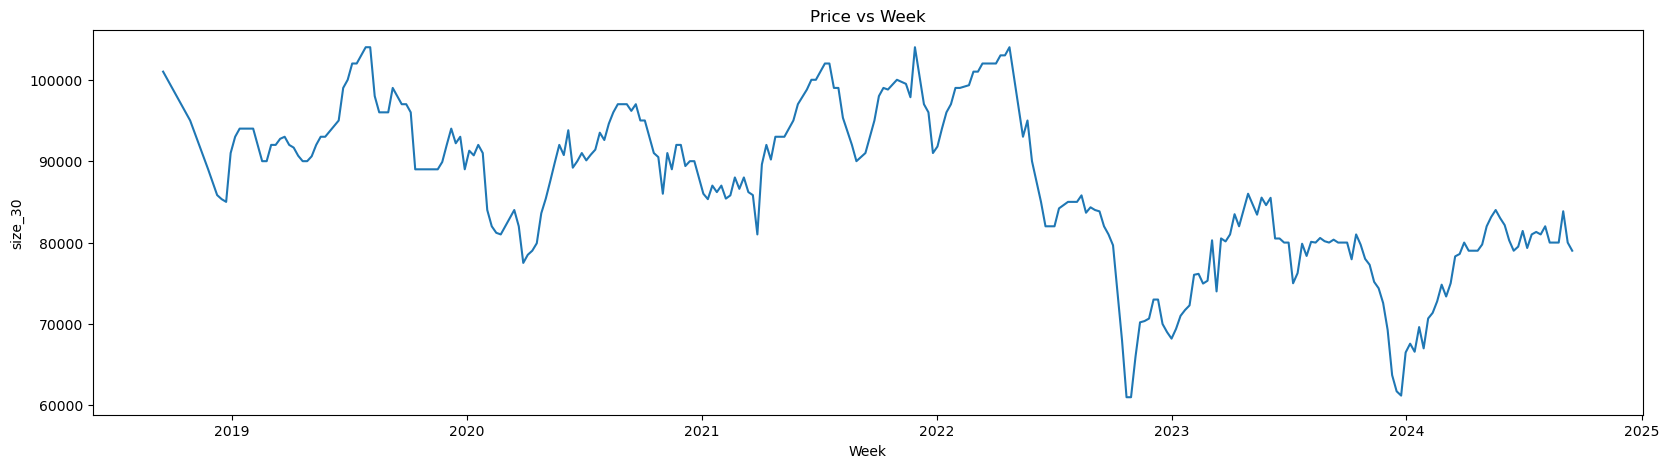

In [7]:
# Visualisasi data
fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (20,5))
plt.subplot(1,1,1)
sns.lineplot(x = df_30.index ,y = 'size_30',data = df_30)
plt.title('Price vs Week');

Grafik Harga Udang size 30 pertahun mulai dari pertengahan tahun 2018 hingga pertengahan tahun 2024 dilihat dari grafik pertahun harga udang mengalami penurunan dan mengalami harga paling rendah di akhir tahun 2022 dan akhir tahun 2023

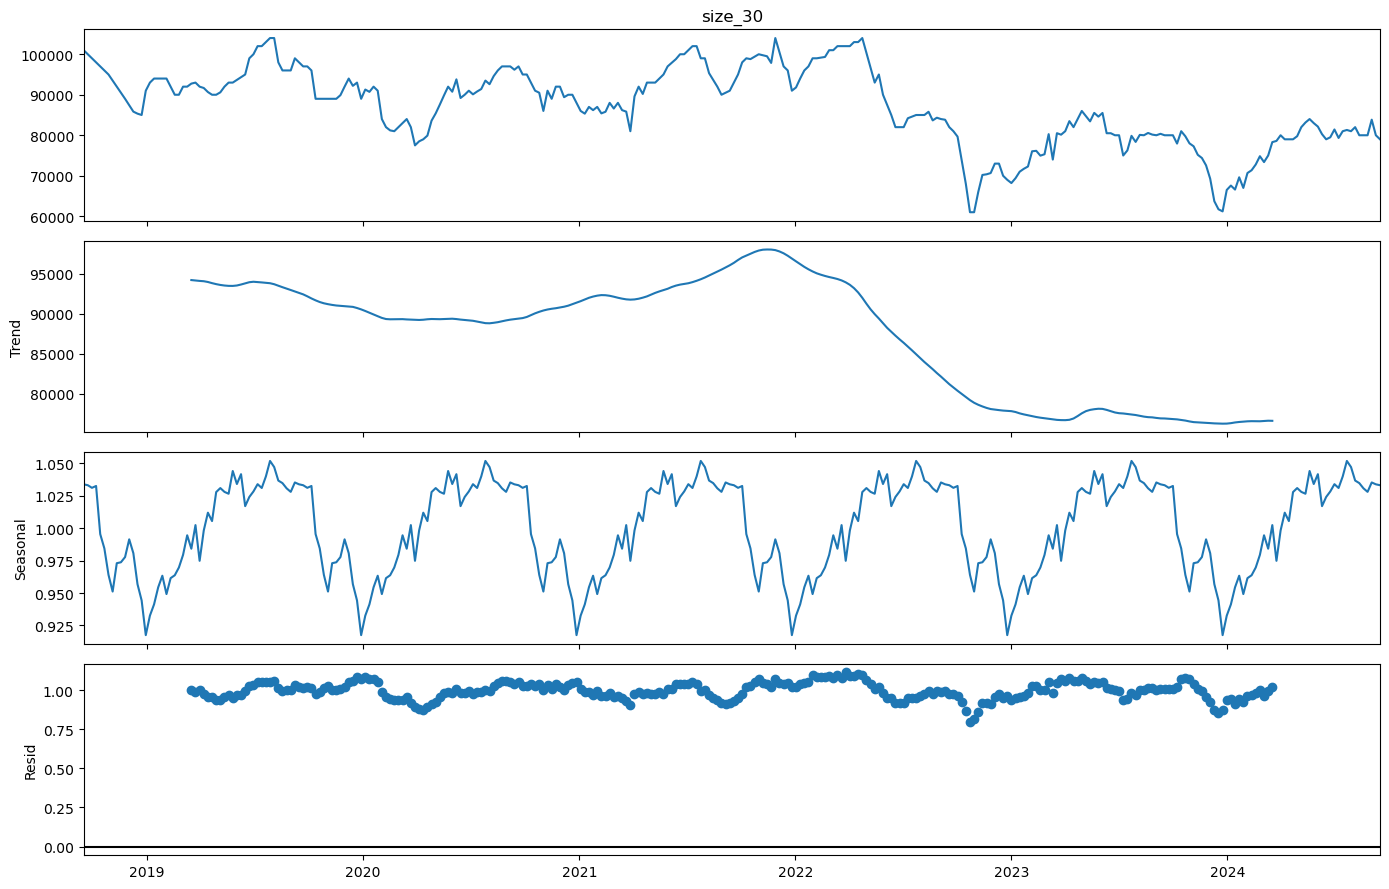

In [8]:
# Dekomposisi timeseries

pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(df_30['size_30'], model='multiplicatif')
ax=res.plot()
plt.show()

In [9]:
# fungsi untuk memeriksa stationarity data

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [10]:
# Proses check stationarity
check_stationarity(df_30['size_30'])

ADF Statistic: -2.643081
p-value: 0.084416
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Non-stationary


Data belum stationary maka dilakukan differencing hingga data stationary

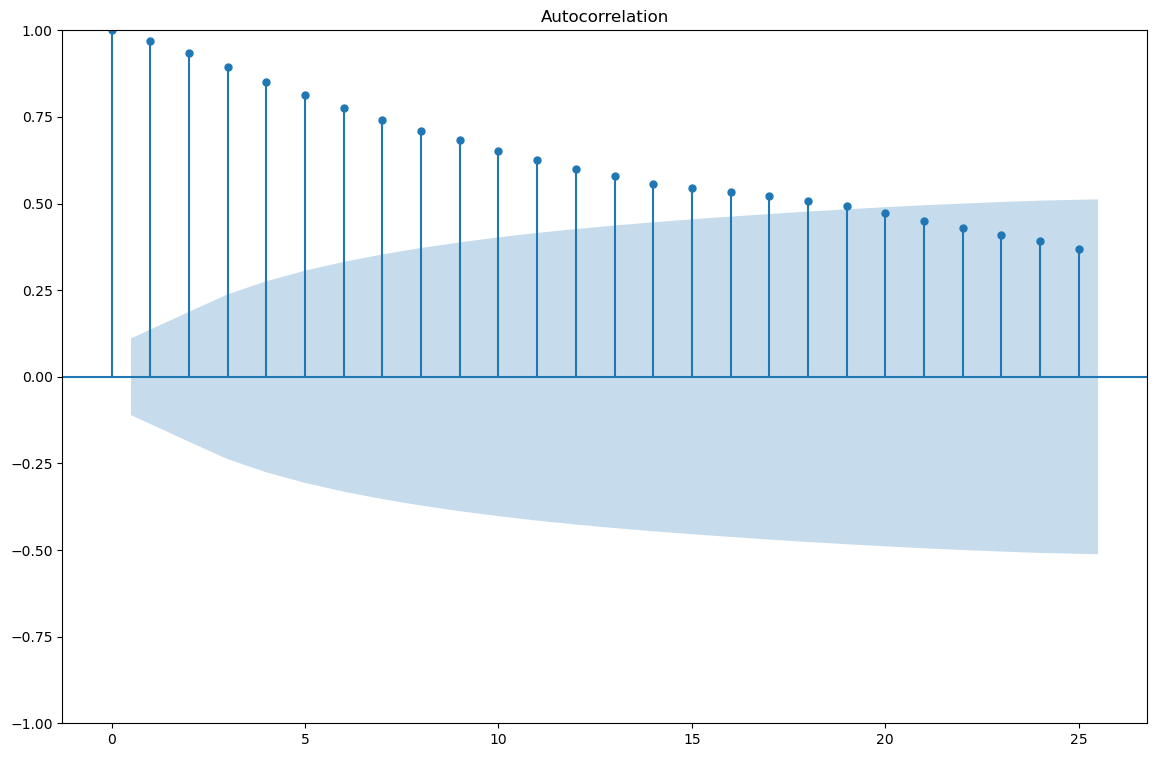

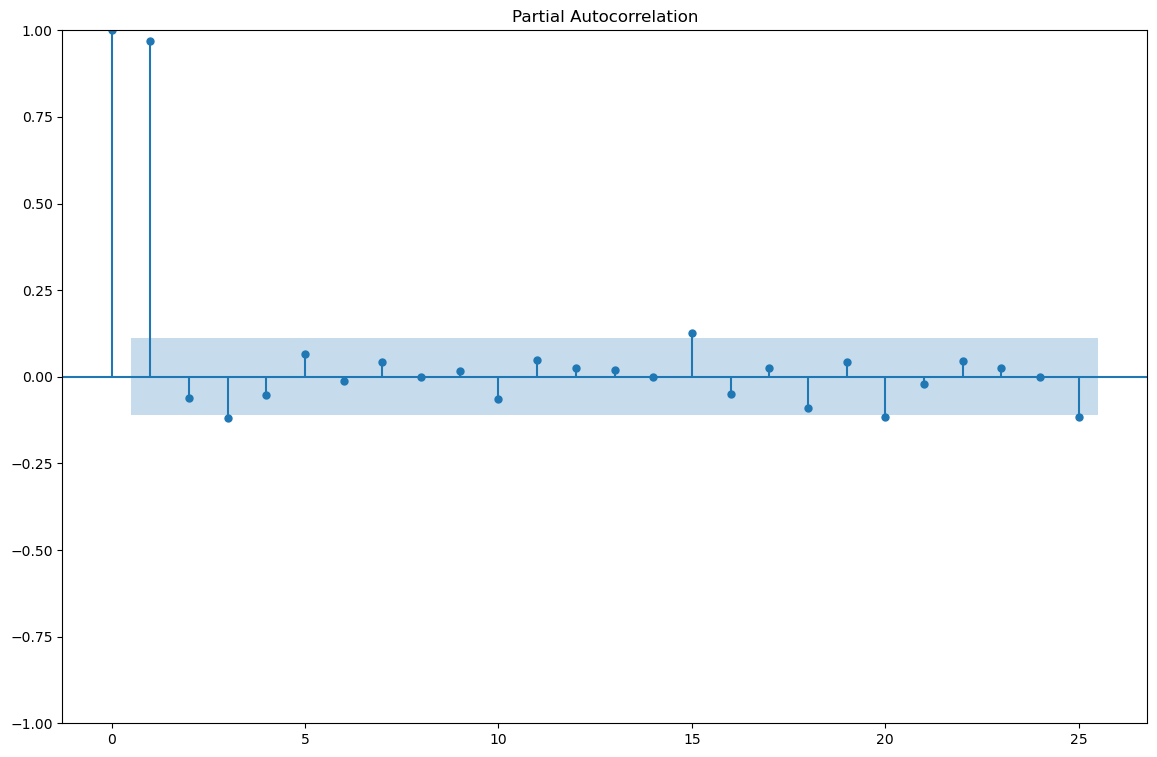

In [11]:
# Visualisasi Plot ACF & PACF

plot_acf(df_30['size_30'])
plot_pacf(df_30['size_30'])
plt.show()

P= 3 D =0 Q = 18 berdasarkan visualisasi acf dan pacf yang belum dilakukan differencing

In [12]:
# Perform first-order differencing

diff1 = df_30['size_30'].diff()
diff1

Week
2018-09-16            NaN
2018-09-23   -1000.000000
2018-09-30   -1000.000000
2018-10-07   -1000.000000
2018-10-14   -1000.000000
                 ...     
2024-08-18       0.000000
2024-08-25       0.000000
2024-09-01    3846.153846
2024-09-08   -3846.153846
2024-09-15   -1000.000000
Name: size_30, Length: 314, dtype: float64

In [13]:
# Check stationarity after performing first-order differencing

print("1st order differencing")
check_stationarity(diff1.dropna())

1st order differencing
ADF Statistic: -10.323845
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Stationary


data sudah stationary setelah dilakukan 1x differencing

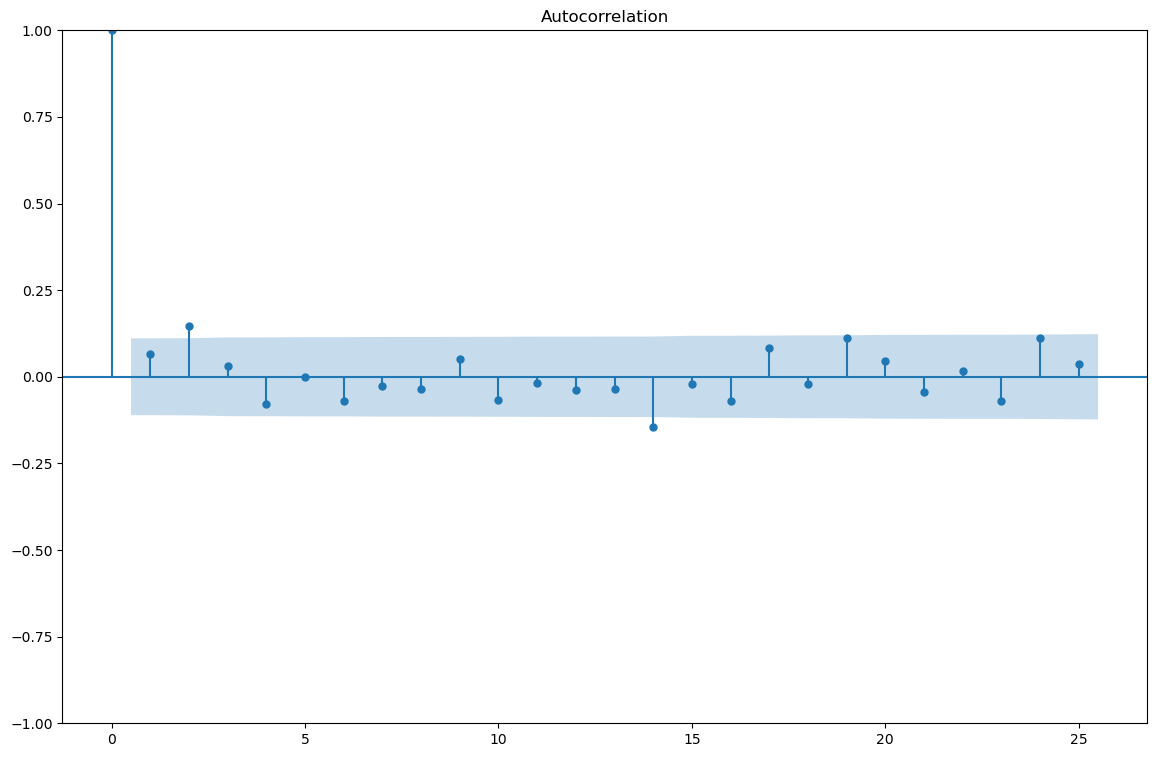

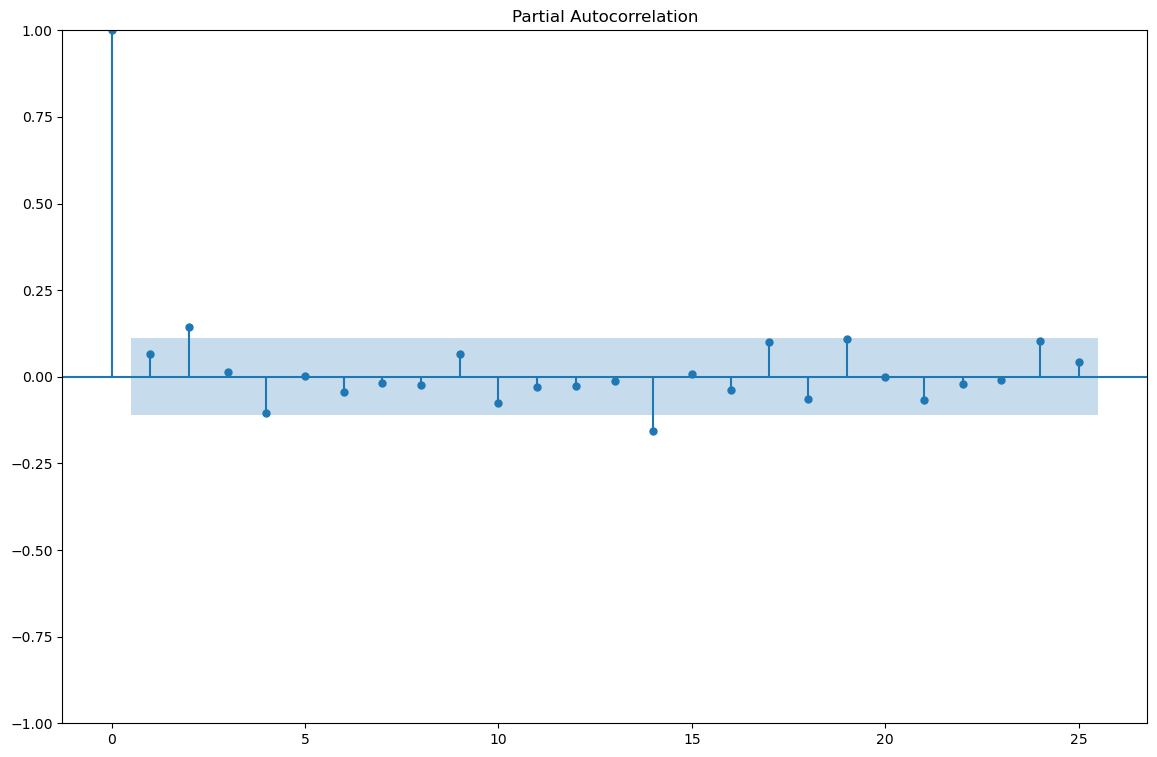

In [14]:
# Plot ACF & PACF after performing first-order differencing

plot_acf(df_30['size_30'].diff().dropna())
plot_pacf(df_30['size_30'].diff().dropna())
plt.show()

P = 2 D = 1 Q = 2

In [16]:
model_arima_visual = ARIMA(df_30['size_30'], order=(2, 1, 2))
result_model_arima_visual = model_arima_visual.fit()

print('The AIC is ', result_model_arima_visual.aic)

The AIC is  5716.372118084355


aic yang didapat dengan menggunakan P = 2 D = 1 Q = 2 adalah 5716

In [17]:
# Membuat fungsi untuk mencari best model berdasarkan ARIMA

def find_best_model(data, num_p, num_d, num_q):
  df = pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
  pdq = [[],[],[]] #This list for storing the combinations of p and q
  aic = [] # This list for storing aic value
  for p in range(num_p + 1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
    for d in range(num_d + 1):
      for q in range(num_q + 1):
        # #if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
        try: #Using exception to avoid the error while training the model with certain p and q value
          model = ARIMA(data, order=(p, d, q))
          result = model.fit()
          pdq[0].append(p)
          pdq[1].append(d)
          pdq[2].append(q)
          aic.append(result.aic)
        except:
          pass #If there is an error caused by the calculation, it will be skipped to the next iteration

  df['p'] = pdq[0]
  df['d'] = pdq[1]
  df['q'] = pdq[2]
  df['AIC'] = aic

  df.sort_values('AIC', inplace=True)

  return df.p.iloc[0], df.d.iloc[0], df.q.iloc[0], df.AIC.iloc[0], df

pembuatan fungsi pencarian best model

# Modeling

In [18]:
train = df_30[:250]
test = df_30[250:]
print(f"Train Size : {train.shape}")
print(f"Test Size : {test.shape}")

Train Size : (250, 1)
Test Size : (64, 1)


jumlah data dibagi menjadi train sebanyak 250 dan test sebanyak 64

In [19]:
# Menggunakan parameter PDQ dari plot visual

model_arima_visual = ARIMA(train['size_30'], order=(2,1,2))
result_model_arima_visual = model_arima_visual.fit()

print("AIC ARIMA Visual :",result_model_arima_visual.aic)

AIC ARIMA Visual : 4560.014626631878


hasil aic train sebesar 4560

In [23]:
arima_pred_test_viz = result_model_arima_visual.predict(start="2023-07-02", end="2024-09-15",dynamic=True)
arima_pred_test_viz = pd.DataFrame(arima_pred_test_viz)
arima_pred_test_viz.columns = ['price_predict_vizplot']

In [24]:
# Concate dengan actual test set
act_vs_pred_sar = pd.concat([test, arima_pred_test_viz],axis=1)
act_vs_pred_sar

,size_30,price_predict_vizplot
2023-07-02,80000.000000,80008.196310
2023-07-09,75000.000000,80039.191569
2023-07-16,76250.000000,80035.790195
2023-07-23,79857.142857,80022.601837
2023-07-30,78357.142857,80024.012489
...,...,...
2024-08-18,80000.000000,80027.535644
2024-08-25,80000.000000,80027.535644
2024-09-01,83846.153846,80027.535644
2024-09-08,80000.000000,80027.535644


In [25]:
print('MAE test  : ', mean_absolute_error(test, arima_pred_test_viz))
print('RMSE test : ', np.sqrt(mean_squared_error(test, arima_pred_test_viz)))

MAE test  :  3778.7926245955377
RMSE test :  6159.551456942209


Hasil MAE setelah dilakukan train dengan menggunakan  P = 2 D = 1 Q = 2 MAE sebesar 3778.79 dan RMSE 6159.55 artinya besar jumlah error harga dari data aktual dan data test sebesar 3778 ini relatif kecil dengan patokan harga per 1kg udangnya di kisaran 80.000 rupiah

In [35]:
size = int(len(df_30) - 65)
train_v2, test_v2 = df_30['size_30'][0:size], df_30['size_30'][size:len(df_30)]

print('\t ARIMA MODEL : In- Sample Forecasting \n')

history = [x for x in train_v2]
predictions = []

for t in range(len(test_v2)):
    
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test_v2[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

	 ARIMA MODEL : In- Sample Forecasting 

predicted = 80410.812848, expected = 80000.000000
predicted = 80008.196310, expected = 80000.000000
predicted = 80031.060404, expected = 75000.000000
predicted = 75393.553200, expected = 76250.000000
predicted = 76155.598985, expected = 79857.142857
predicted = 79881.370227, expected = 78357.142857
predicted = 78437.944415, expected = 80090.909091
predicted = 80065.834296, expected = 80000.000000
predicted = 79986.667662, expected = 80566.037736
predicted = 80570.868495, expected = 80166.666667
predicted = 80179.501233, expected = 80000.000000
predicted = 79993.453442, expected = 80357.142857
predicted = 80349.468989, expected = 80000.000000
predicted = 80006.456606, expected = 80000.000000
predicted = 79998.385250, expected = 80000.000000
predicted = 79997.214619, expected = 77944.444444
predicted = 77940.229090, expected = 81000.000000
predicted = 80972.425935, expected = 79750.000000
predicted = 79795.591541, expected = 78000.000000
predicted

In [36]:
# Menghitung MAPE
mape = np.mean(np.abs((test_v2 - predictions) / test_v2)) * 100

print('MAPE test : ', mape)

MAPE test :  2.016873440033678


besar MAPE test 2.016 yang artinya percentage error harga dari prediksi dan actual hanya 2%

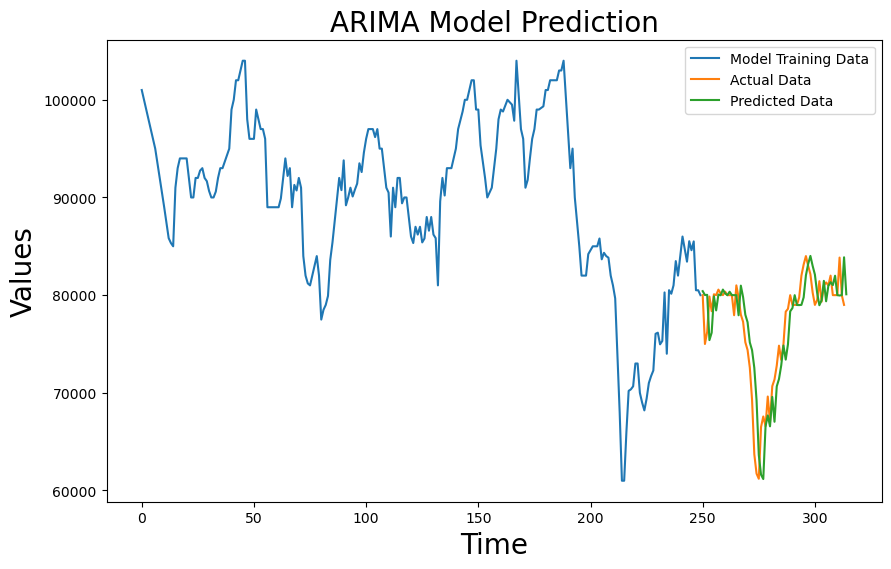

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Plot training data
plt.plot(range(len(train)), train, label='Model Training Data')

# Plot actual data (test set)
plt.plot(range(len(train), len(train) + len(test)), test, label='Actual Data')

# Plot predicted data
plt.plot(range(len(train), len(train) + len(predictions)), predictions, label='Predicted Data')

# Add labels and title
plt.xlabel('Time', size=20)
plt.ylabel('Values', size=20)
plt.title('ARIMA Model Prediction', size=20)
plt.legend()

# Show plot
plt.show()

visualiasi Harga udang size 30 yang dilakukan yang test pada data ke 250 hingga data ke 314 dari visualiasi cukup bagus karna harga prediksi tidak begitu jauh dengan harga aktual nya

In [53]:
with open('model30.pkl','wb') as model30_file:
    pickle.dump(result_model_arima_visual, model30_file)

Saving Model arima

# SARIMA

In [40]:
# Splitting dataset

train_sar = df_30[:250]
test_sar = df_30[250:]

print('Train size : ', train_sar.shape)
print('Test size : ', test_sar.shape)

Train size :  (250, 1)
Test size :  (64, 1)


Pembagian data train dan data test

In [41]:

# Train using SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

sar=SARIMAX(train_sar['size_30'], order=(2, 1, 2),seasonal_order=(2, 1, 2, 27)).fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            size_30   No. Observations:                  250
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 27)   Log Likelihood               -2099.401
Date:                            Tue, 24 Sep 2024   AIC                           4216.801
Time:                                    14:15:56   BIC                           4247.425
Sample:                                09-16-2018   HQIC                          4229.165
                                     - 06-25-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9222      2.265      0.407      0.684      -3.516       5.361
ar.L2         -0.4154      1.632     -0.255      0.799      -3.615       2.784
ma.L1         -0.8856      2.256     -0.393      0.695      -5.308       3.537
ma.L2          0.4205      1.551      0.271      0.786      -2.619       3.460
ar.S.L27      -0.4327      0.308     -1.407      0.159      -1.035       0.170
ar.S.L54       0.5485      0.116      4.742      0.000       0.322       0.775
ma.S.L27       0.1503      0.326      0.460      0.645      -0.489       0.790
ma.S.L54      -0.8139      0.226     -3.601      0.000      -1.257      -0.371
sigma2      1.121e+07   3.63e-07   3.09e+13      0.000    1.12e+07    1.12e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):                 9.77
Prob(Q):                              0.30   Prob(JB):                         0.01
Heteroskedasticity (H):               1.25   Skew:                            -0.25
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.6e+30. Standard errors may be unstable.
"""

AIC yang didapat setelah dilakukan modeling menggunakan sarimax didapat aic 4216.801

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict test-set
sar_pred_test = sar.predict(start="2023-07-02", end="2024-09-15", dynamic=True)
sar_pred_test = pd.DataFrame(sar_pred_test)
sar_pred_test.columns = ['size_30_predict']

# Reset index for alignment
test_sar_reset = test_sar['size_30'].reset_index(drop=True)
sar_pred_test_reset = sar_pred_test['size_30_predict'].reset_index(drop=True)

# Concatenate predictions with actual values
act_vs_pred_sar = pd.concat([test_sar_reset, sar_pred_test_reset], axis=1)

# Check the MAE & RMSE
mae_test = mean_absolute_error(test_sar_reset, sar_pred_test_reset)
rmse_test = np.sqrt(mean_squared_error(test_sar_reset, sar_pred_test_reset))

print('MAE test  : ', mae_test)
print('RMSE test : ', rmse_test)

# Display actual vs predicted
print(act_vs_pred_sar)


MAE test  :  13720.788253351931
RMSE test :  15179.200871578534
         size_30  size_30_predict
0   80000.000000     79149.300978
1   75000.000000     78603.679704
2   76250.000000     79602.688491
3   79857.142857     80798.513347
4   78357.142857     81449.487742
..           ...              ...
59  80000.000000     95580.460266
60  80000.000000     97445.230699
61  83846.153846     97613.548410
62  80000.000000     97344.724203
63  79000.000000     97269.222838

[64 rows x 2 columns]


Hasil dari melatih model terhadap data test didapat MAE sebesar 13720 dan RMSE 15179

In [44]:
# Menghitung MAPE dengan menangani pembagian dengan nol
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Mengabaikan nilai aktual yang sama dengan nol untuk menghindari pembagian dengan nol
    non_zero_idx = y_true != 0
    y_true_non_zero = y_true[non_zero_idx]
    y_pred_non_zero = y_pred[non_zero_idx]
    
    # Hitung MAPE hanya pada data yang tidak memiliki nilai aktual nol
    mape = np.mean(np.abs((y_true_non_zero - y_pred_non_zero) / y_true_non_zero)) * 100
    return mape

# Contoh penggunaan
mape_test = mean_absolute_percentage_error(test_sar_reset, sar_pred_test_reset)
print('MAPE test: ', mape_test)


MAPE test:  18.341569584981794


MAPE test data test dengan predict test sebesar 18.34%

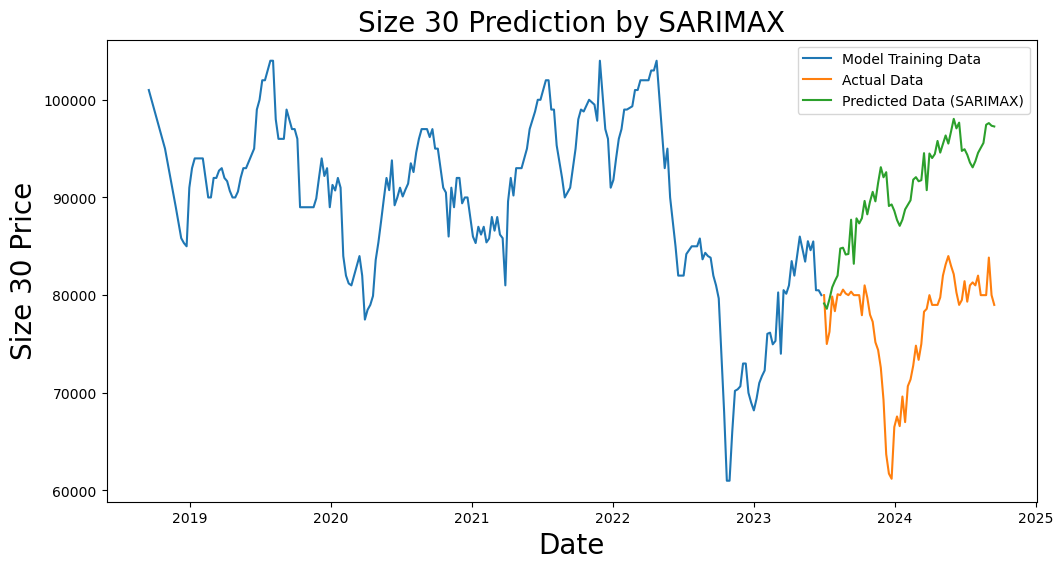

In [45]:
import matplotlib.pyplot as plt

# Plotting the SARIMAX model results
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train_sar['size_30'], label='Model Training Data')

# Plot actual test data
plt.plot(test_sar['size_30'].index, test_sar['size_30'], label='Actual Data')

# Plot predicted test data
plt.plot(test_sar['size_30'].index, sar_pred_test_reset, label='Predicted Data (SARIMAX)')

# Adding labels, title, and legend
plt.xlabel('Date', size=20)
plt.ylabel('Size 30 Price', size=20)
plt.title('Size 30 Prediction by SARIMAX', size=20)
plt.legend()

# Show plot
plt.show()


Visualisasi Grafik Harga udang size 30 pada yang dimulai pada pertengahan tahun 2023 hingga pertengahan tahun 2024.Dari visualisasi yang didapat Grafik prediksi harga menggunakan model sarima dan grafik data actual cukup berbeda secara signifikan dikarnakan MAE TEST yang tinggi dan juga MAPE Test yang tinggi membuat grafik cukup berbeda dibandingkan dengan menggunakan model arima


# Conclusion

Setelah dilakukan Uji Data test dengan penggunaan 2 model ARIMA dan SARIMA maka model yang akan dipilih untuk penggunaan aplikasi UJATIM adalah model ARIMA, ini dikarenakan berdasarkan MAE dan MAPE test yang didapat dengan menggunakan Model ARIMA cenderung lebih rendah dibandingkan dengan penggunaan model SARIMA